## Yelp Challenge

Dataset Documentation: <br>
https://www.yelp.com/dataset/documentation/main

In [1]:
import pandas as pd
import numpy as np
from cmfrec import CMF
import pycmf

import matplotlib.pyplot as plt
import tarfile
import json
from tqdm import tqdm

In [11]:
zf = tarfile.open('yelp_dataset.tar') 
#df = pd.read_csv(zf.open('intfile.csv'))
for name in zf.list():
    print (name)

?rw-r--r-- daniellg/users  138279749 2018-11-15 11:22:39 business.json 
?rw-r--r-- daniellg/users  408807658 2018-11-15 11:25:00 checkin.json 
?rw-r--r-- daniellg/users 5347475638 2018-11-15 11:35:37 review.json 
?rw-r--r-- daniellg/users  244535478 2018-11-15 11:26:18 tip.json 
?rw-r--r-- daniellg/users 2485747393 2018-11-15 11:24:48 user.json 
?rw-r--r-- daniellg/users   25661152 2019-01-11 19:06:09 photo.json 
?rw-r--r-- daniellg/users     101186 2019-01-14 11:31:35 Dataset_Challenge_Dataset_Agreement.pdf 
?rw-r--r-- daniellg/users     111822 2019-01-14 11:35:09 Yelp_Dataset_Challenge_Round_13.pdf 


TypeError: 'NoneType' object is not iterable

In [12]:
## Feel free to extract more files here
zf.extract("review.json")
zf.extract("business.json")
zf.extract("user.json")

In [15]:
# load business.json
# 192609 unique businesses?
line_count = len(open("./yelp_dataset/business.json").readlines())
business_ids, cities, states, latitudes, longitudes, stars, review_counts, attributes, categories = [], [], [], [], [], [], [], [], []
with open("./yelp_dataset/business.json") as f:
    for line in tqdm(f, total=line_count):
        blob = json.loads(line)
        business_ids += [blob["business_id"]]
        cities += [blob["city"]]
        states += [blob["state"]]
        latitudes += [blob["latitude"]]
        longitudes += [blob["longitude"]]
        stars += [blob["stars"]]
        review_counts += [blob["review_count"]]
        attributes += [blob["attributes"]]
        categories += [blob["categories"]]
        
businesses = pd.DataFrame(
    {"business_id": business_ids, "city": cities, "state": states, "latitude": latitudes, "longitude": longitudes, "stars": stars, "review_counts": review_counts, "attributes": attributes, "categories":categories }
)

100%|██████████| 192609/192609 [00:03<00:00, 53331.26it/s]


In [13]:
# EDA on business.json
businesses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192609 entries, 0 to 192608
Data columns (total 9 columns):
business_id      192609 non-null object
city             192609 non-null object
state            192609 non-null object
latitude         192609 non-null float64
longitude        192609 non-null float64
stars            192609 non-null float64
review_counts    192609 non-null int64
attributes       163773 non-null object
categories       192127 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 13.2+ MB


In [4]:
businesses.head()

,business_id,city,state,latitude,longitude,stars,review_counts,attributes,categories
0,1SWheh84yJXfytovILXOAQ,Phoenix,AZ,33.522143,-112.018481,3.0,5,{'GoodForKids': 'False'},"Golf, Active Life"
1,QXAEGFB4oINsVuTFxEYKFQ,Mississauga,ON,43.605499,-79.652289,2.5,128,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported..."
2,gnKjwL_1w79qoiV3IC_xQQ,Charlotte,NC,35.092564,-80.859132,4.0,170,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese"
3,xvX2CttrVhyG2z1dFg_0xw,Goodyear,AZ,33.455613,-112.395596,5.0,3,None,"Insurance, Financial Services"
4,HhyxOkGAM07SRYtlQ4wMFQ,Charlotte,NC,35.190012,-80.887223,4.0,4,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi..."


In [5]:
businesses[businesses.state == 'XWY']

,business_id,city,state,latitude,longitude,stars,review_counts,attributes,categories
54920,44xjnQMwAQjgZ80MW5z-Gg,Leeds,XWY,45.456999,-73.595250,4.5,3,"{'RestaurantsDelivery': 'True', 'RestaurantsTa...","Bakeries, Food, Desserts, Restaurants, Sandwiches"
133170,FByZsT1Sob5Vf1AYJFPxPg,Leeds,XWY,43.652821,-79.376345,4.5,5,"{'RestaurantsReservations': 'True', 'NoiseLeve...","Indian, Pakistani, Restaurants"


In [6]:
# average rating by state
# so 36 unique states, but some very big ones
state_ratings = pd.DataFrame(businesses.groupby('state').size(), columns = ['cnt'])
state_ratings.sort_values(by = "cnt", ascending = False)


,cnt
state,
AZ,56686
NV,36312
ON,33412
NC,14720
OH,14697
PA,11216
QC,9219
AB,8012
WI,5154


/Users/bowenzhou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


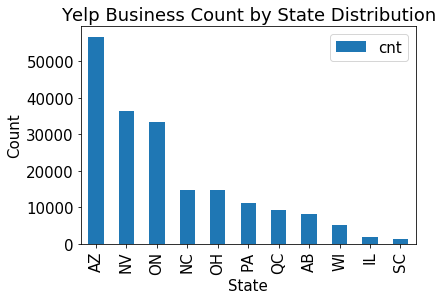

In [7]:
plt.rc("font", size = 15)
state_ratings.sort_values(by = 'cnt', ascending = False)[state_ratings.cnt > 1000].plot(kind = 'bar')
plt.title('Yelp Business Count by State Distribution')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

In [8]:
counts = businesses['state'].value_counts()
counts[counts > 10]

AZ    56686
NV    36312
ON    33412
NC    14720
OH    14697
PA    11216
QC     9219
AB     8012
WI     5154
IL     1932
SC     1162
NY       22
CA       19
Name: state, dtype: int64

In [9]:
state_10 = businesses[businesses['state'].isin(counts[counts>10].index)]
state_10['state'].value_counts()

AZ    56686
NV    36312
ON    33412
NC    14720
OH    14697
PA    11216
QC     9219
AB     8012
WI     5154
IL     1932
SC     1162
NY       22
CA       19
Name: state, dtype: int64

In [10]:
# state avg rating
# filter out rating counts < 10
state_avgr = pd.DataFrame(state_10.groupby('state').stars.mean())
state_avgr.columns = ['state_avg']
state_avgr.sort_values('state_avg', ascending = False)

,state_avg
state,
CA,4.026316
AZ,3.707185
NV,3.696423
QC,3.635535
WI,3.610691
PA,3.577523
NC,3.542187
OH,3.505341
SC,3.503873


In [11]:
businesses = businesses.merge(state_avgr, on = "state")

In [23]:
businesses

,business_id,city,state,latitude,longitude,stars,review_counts,attributes,categories,state_avg
0,1SWheh84yJXfytovILXOAQ,Phoenix,AZ,33.522143,-112.018481,3.0,5,{'GoodForKids': 'False'},"Golf, Active Life",3.707185
1,xvX2CttrVhyG2z1dFg_0xw,Goodyear,AZ,33.455613,-112.395596,5.0,3,None,"Insurance, Financial Services",3.707185
2,Y6iyemLX_oylRpnr38vgMA,Glendale,AZ,33.654815,-112.188568,5.0,8,"{'RestaurantsPriceRange2': '2', 'ByAppointment...","Nail Salons, Beauty & Spas, Day Spas",3.707185
3,1Dfx3zM-rW4n-31KeC8sJg,Phoenix,AZ,33.495194,-112.028588,3.0,18,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Breakfast & Brunch, Mexican, Taco...",3.707185
4,giC3pVVFxCRR89rApqklyw,Scottsdale,AZ,33.600071,-111.977371,5.0,5,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Hair Stylists, Beauty & Spas, Hair Salons, Men...",3.707185
5,mNBp4KI2goFJKDB9VLGP9w,Phoenix,AZ,33.538024,-112.103201,5.0,4,None,"Automotive, Auto Repair",3.707185
6,0_ohldeFwysbglrTLSGM4Q,Glendale,AZ,33.623871,-112.186448,3.5,6,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Beauty & Spas, Barbers",3.707185
7,M9DM1ktbW-TB7nXu3Z4RDw,Mesa,AZ,33.391003,-111.843620,2.5,6,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Real Estate, Apartments, Hotels...",3.707185
8,hgPhZoB3zdiRdlT9FETskw,Gilbert,AZ,33.278251,-111.777460,5.0,12,{'BusinessAcceptsCreditCards': 'True'},"Auto Glass Services, Auto Detailing, Automotiv...",3.707185
9,teknANRU8ZKnwdIHWYyd8Q,Scottsdale,AZ,33.616838,-111.927310,5.0,10,"{'ByAppointmentOnly': 'False', 'BusinessAccept...","Massage Therapy, Massage, Health & Medical, Be...",3.707185


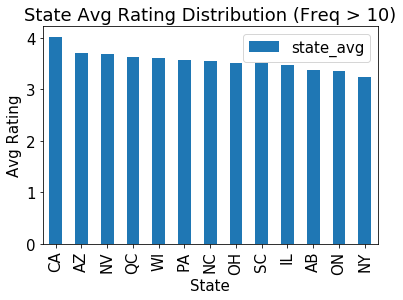

In [24]:
# though with limited data, CA the most friendly and NY the most picky
# but we will not use this state average rating, since this is the average rating
# calculated from the business total rating scores
plt.rc("font", size = 15)
state_avgr.sort_values(by = 'state_avg', ascending = False).plot(kind = 'bar')
plt.title('State Avg Rating Distribution (Freq > 10)')
plt.xlabel('State')
plt.ylabel('Avg Rating')
plt.show()

In [22]:
# load user.json
# 1637138 unique users?
line_count = len(open("./yelp_dataset/user.json").readlines())
users, review_counts, elites, average_stars, friends = [], [], [], [], []
with open("./yelp_dataset/user.json") as f:
    for line in tqdm(f, total=line_count):
        blob = json.loads(line)
        users += [blob["user_id"]]
        review_counts += [blob["review_count"]]
        elites += [blob["elite"]]
        average_stars += [blob["average_stars"]]
        friends += [blob["friends"]]
        
users = pd.DataFrame(
    {"user_id": users, "review_count": review_counts,"elite": elites, "average_stars": average_stars, "friends": friends}
)

100%|██████████| 1637138/1637138 [00:20<00:00, 80222.92it/s] 


In [14]:
# load review.json
# 6685900 unique reviews?
line_count = len(open("./yelp_dataset/review.json").readlines())
user_ids, business_ids, stars, dates, texts = [], [], [], [], []
with open("./yelp_dataset/review.json") as f:
    for line in tqdm(f, total=line_count):
        blob = json.loads(line)
        user_ids += [blob["user_id"]]
        business_ids += [blob["business_id"]]
        stars += [blob["stars"]]
        dates += [blob["date"]]
        texts += [blob["text"]]
reviews = pd.DataFrame(
    {"user_id": user_ids, "business_id": business_ids, "rating": stars, "date": dates, "text": texts}
)
user_counts = reviews["user_id"].value_counts()
active_users = user_counts.loc[user_counts >= 5].index.tolist()
reviews = reviews.loc[reviews.user_id.isin(active_users)]

100%|██████████| 6685900/6685900 [00:51<00:00, 129893.66it/s]


In [16]:
ratings_holdout = pd.read_csv('data/ratings_sample_holdout.csv')

In [17]:
ratings_train = pd.read_csv('data/ratings_sample_train.csv')

In [18]:
ratings_val = pd.read_csv('data/ratings_sample_cv.csv')

In [19]:
def process(df):
    df = df.drop(df.columns[0], axis =1)
    df['date']  = pd.to_datetime(df['date'])
    df['week_day'] = df['date'].dt.weekday
    df['month'] = df['date'].dt.month
    df['hour'] = df['date'].dt.hour
    df = df.merge(users, on = 'user_id')
    df = df.merge(businesses, on = 'business_id')
    return df

In [23]:
# states with less than 10 restaurants are already filtered out
ratings_train = process(ratings_train.copy())

In [24]:
ratings_holdout = process(ratings_holdout.copy())

In [25]:
ratings_val = process(ratings_val.copy())

In [26]:
print('There are {0} rows, {1} columns in training set.'.format(ratings_train.shape[0], ratings_train.shape[1]))
print('There are {0} rows, {1} columns in holdout set.'.format(ratings_holdout.shape[0], ratings_holdout.shape[1]))
print('There are {0} rows, {1} columns in validation set.'.format(ratings_val.shape[0], ratings_val.shape[1]))

There are 406042 rows, 20 columns in training set.
There are 28612 rows, 20 columns in holdout set.
There are 28615 rows, 20 columns in validation set.


In [27]:
ratings_train.shape

(406042, 20)

## Approach 1: 
### CMF on User, Business and State Average Rating

Collective Matrix Factorization method decomposes two matrices $X$ and $Y$ into three matrices $U$, $V$, and $Z$ such that $X \approx f(UV^T)$ and $ Y \approx f(VZ^T)$, where f is either the identity or sigmoid function. This allows us to include additional features of our users or items that might help optimize the result of personalization. In the first approach, we calculated state average rating as an additional feature on the items (i.e., the restaurants). The idea is as follows: our goal is to predict the last rating for each active user. To bring closer our prediction to the actual rating, we felt that state average rating can help. In other words, "eaters" should have similar pickiness when it comes to foods and restaurants in the same state. They know the best about the expectation they should have for restaurants around them as the locals, and we wanted to take into account of this aspect. In particular, we didn't do the average calculation by summing up from the business dataset, because that will be somewhat "leaking" the information, since we are holding out the last rating of our active users. Thus, we calculated the ratings from the training ratings by user by state.

For example, (and in fact from our EDA, though with limited data), people in CA seem to be less critical with foods and restaurants as they tend to have a higher state average rating (perhaps, it already takes away a lot of energy to drive around to the restaurants as CA is such a massive land, so they just complain less), whereas people in NY really have opinions and take very personally with what they intake as their state average rating tends to be lower (perhaps, and it seems reasonable, that NY is known as the food hub, so people definitely will have a higher expectation for foods). In other words, we are trying to make up this very "subjective" assumption about the eating behaviors of the yelp users (that they really know what they are eating) and we will test the performance of our model to see how it works.

### a. use cmfrec

In [40]:
# state avg rating
# filter out rating counts < 10
state_avgr = pd.DataFrame(state_10.groupby('state').stars.mean())
state_avgr.columns = ['state_avg']
state_avgr.sort_values('state_avg', ascending = False)

,state_avg
state,
CA,4.026316
AZ,3.707185
NV,3.696423
QC,3.635535
WI,3.610691
PA,3.577523
NC,3.542187
OH,3.505341
SC,3.503873


In [33]:
state_avg = pd.DataFrame(ratings_train.groupby("state").rating.mean())
state_avg.columns = ['state_avg']
state_avg

,state_avg
state,
AB,3.723867
AL,5.000000
AZ,3.782154
BC,1.500000
CA,4.000000
CT,5.000000
FL,2.074074
IL,3.717804
NC,3.708263


In [34]:
ratings_train = ratings_train.merge(state_avg, on = "state")

In [35]:
ratings_train.shape

(406042, 21)

In [36]:
model = CMF(k = 20)

In [37]:
# make X_train
X_train = ratings_train.iloc[:, 0:3]
X_train.columns = ['UserId','ItemId','Rating']
X_train.head()

,UserId,ItemId,Rating
0,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5.0
1,bLPmbJ0x70HSHfD-2n_smw,WTqjgwHlXbSFevF32_DJVw,1.0
2,n6-Gk65cPZL6Uz8qRm3NYw,30Q5xBagQHmkwp8Q9I1FCg,5.0
3,wJgtf18VKKZq9A6ZQUybQw,30Q5xBagQHmkwp8Q9I1FCg,4.0
4,jqyS91iI63nyztPAvRk1AQ,30Q5xBagQHmkwp8Q9I1FCg,4.0


In [39]:
# make Y_train
Y_train = ratings_train.loc[:,['business_id','state_avg']]
Y_train.columns = ['ItemId','state_avg']
Y_train.head()

,ItemId,state_avg
0,WTqjgwHlXbSFevF32_DJVw,3.782154
1,WTqjgwHlXbSFevF32_DJVw,3.782154
2,30Q5xBagQHmkwp8Q9I1FCg,3.782154
3,30Q5xBagQHmkwp8Q9I1FCg,3.782154
4,30Q5xBagQHmkwp8Q9I1FCg,3.782154


In [41]:
%%time
model.fit(ratings = X_train, item_info = Y_train)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 1.602632
  Number of iterations: 322
  Number of functions evaluations: 343
CPU times: user 10min 55s, sys: 1min 41s, total: 12min 37s
Wall time: 2min 18s


In [42]:
X_test = ratings_holdout.iloc[:,0:3]
X_test.head()

,user_id,business_id,rating
0,n6-Gk65cPZL6Uz8qRm3NYw,hk5wpV-_pi5jmDDVPeG8DA,5.0
1,FIk4lQQu1eTe2EpzQ4xhBA,jLxeBgWhLRbII2ACkgH1Sg,4.0
2,9cOyDUT20H7iTxU9CU8I6Q,jLxeBgWhLRbII2ACkgH1Sg,5.0
3,_N7Ndn29bpll_961oPeEfw,O-b5osM0NO4f31dp6_DatQ,3.0
4,453V8MlGr8y61PpsDAFjKQ,O-b5osM0NO4f31dp6_DatQ,5.0


In [53]:
subset = X_test[['user_id', 'business_id']]
tuples = [tuple(x) for x in subset.to_numpy()]

In [60]:
X_test_user = list(X_test.user_id)
X_test_item = list(X_test.business_id)

In [63]:
prediction = model.predict(X_test_user, X_test_item)

In [65]:
X_test['pred_rating'] = prediction

In [67]:
# to notice here, there are NaN in the prediction scores; 
# from the documentation, it means that there is user/item that 
# was not in the training set, then the prediction for it will be NaN.
X_test

,user_id,business_id,rating,pred_rating
0,n6-Gk65cPZL6Uz8qRm3NYw,hk5wpV-_pi5jmDDVPeG8DA,5.0,NaN
1,FIk4lQQu1eTe2EpzQ4xhBA,jLxeBgWhLRbII2ACkgH1Sg,4.0,4.316868
2,9cOyDUT20H7iTxU9CU8I6Q,jLxeBgWhLRbII2ACkgH1Sg,5.0,4.180414
3,_N7Ndn29bpll_961oPeEfw,O-b5osM0NO4f31dp6_DatQ,3.0,4.114175
4,453V8MlGr8y61PpsDAFjKQ,O-b5osM0NO4f31dp6_DatQ,5.0,4.367810
5,oYYxqbRWb92oBajOQP8NlA,O-b5osM0NO4f31dp6_DatQ,5.0,3.959124
6,GMkjaAJ3puIf0zn1E1TVXQ,O-b5osM0NO4f31dp6_DatQ,5.0,4.094328
7,C_hUvw2z0R-Rv0yZb6QCZA,O19VReN1I2TBrJsbXUAIJg,5.0,3.564336
8,Y0UHmlB06TZ1OQuQoQ4dxw,O19VReN1I2TBrJsbXUAIJg,5.0,4.184867
9,bCpimZ6jX8SRX7woLu09eQ,O19VReN1I2TBrJsbXUAIJg,5.0,3.995416


## Approach 2: One-hot Encode State

In [ ]:
# get states list
state_list = list(df_state.columns)
state_list

In [ ]:
# one-hot encode state
df_state = pd.get_dummies(ratings_train.state)
df_state
ratings_train = ratings_train.join(df_state)

## Test Code

In [ ]:
## simulating some movie ratings
nusers = 10**2
nitems = 10**2
nobs = 10**3
np.random.seed(1)
ratings = pd.DataFrame({
    'UserId' : np.random.randint(nusers, size = nobs),
    'ItemId' : np.random.randint(nusers, size = nobs),
    'Rating' : np.random.randint(nusers, size = nobs),
})

## random product side information
user_dim = 10
user_attributes = pd.DataFrame(np.random.normal(size=(nusers, user_dim)))
user_attributes['UserId'] = np.arange(nusers)
user_attributes = user_attributes.sample(int(nusers/2), replace=False)

item_dim = 5
item_attributes = pd.DataFrame(np.random.normal(size=(nitems, item_dim)))
item_attributes['ItemId'] = np.arange(nitems)
item_attributes = item_attributes.sample(int(nitems/2), replace=False)

In [ ]:
# fitting a model and making some recommendations
recommender = CMF(k=20, k_main=3, k_user=2, k_item=1, reg_param=1e-4)
recommender.fit(ratings=ratings, user_info=user_attributes, item_info=item_attributes, cols_bin_user=None, cols_bin_item=None)
recommender.topN(user=4, n=10)
recommender.topN_cold(attributes=np.random.normal(size=user_dim), n=10)
recommender.predict(user=0, item=0)
recommender.predict(user=[0,0,1], item=[0,1,0])

In [ ]:
# adding more users and items without refitting
recommender.add_item(new_id=10**3, attributes=np.random.normal(size=item_dim), reg='auto')
recommender.add_user(new_id=10**3, attributes=np.random.normal(size=user_dim), reg=1e-3)
recommender.topN(10**3)
recommender.predict(user=10**3, item=10**3)

In [ ]:
## full constructor call
recommender = CMF(k=30, k_main=0, k_user=0, k_item=0,\
                  w_main=1.0, w_user=1.0, w_item=1.0, reg_param=1e-4,\
                  offsets_model=False, nonnegative=False, maxiter=1000,\
                  standardize_err=True, reweight=False, reindex=True,\
                  center_ratings=True, add_user_bias=True, add_item_bias=True,\
                  center_user_info=False, center_item_info=False,\
                  user_info_nonneg=False, item_info_nonneg=False,\
                  keep_data=True, save_folder=None, produce_dicts=True,\
                  random_seed=None, verbose=True)

## Approach 1: run CMF on user, business and location

## Approach 2: run CMF on user, business and location avg rating 

In [ ]:
zf = tarfile.open('yelp_dataset.tar') 
#df = pd.read_csv(zf.open('intfile.csv'))
for name in zf.list():
    print (name)

In [ ]:
## Feel free to extract more files here
#zf.extract("review.json")

In [ ]:
line_count = len(open("review.json").readlines())
user_ids, business_ids, stars, dates, texts = [], [], [], [], []
with open("review.json") as f:
    for line in tqdm(f, total=line_count):
        blob = json.loads(line)
        user_ids += [blob["user_id"]]
        business_ids += [blob["business_id"]]
        stars += [blob["stars"]]
        dates += [blob["date"]]
        texts += [blob["text"]]
ratings = pd.DataFrame(
    {"user_id": user_ids, "business_id": business_ids, "rating": stars, "date": dates, "text": texts}
)
user_counts = ratings["user_id"].value_counts()
active_users = user_counts.loc[user_counts >= 5].index.tolist()
ratings = ratings.loc[ratings.user_id.isin(active_users)]

In [ ]:
active_users[0:5]

In [ ]:
ratings.head()

In [ ]:
ratings.shape

In [ ]:
n_users = len(ratings.user_id.unique())
n_restaurants = len(ratings.business_id.unique())
print('Unique Users: {0}, unique restaurants: {1}'.format(n_users, n_restaurants))

### Notes

1. Baseline:
User based (Bowen)
ALS (later)


1. Cold start: (<5 reviews)
content based (Nearest neighbors on review text, metadata tex) (Zhongling)


2. Main model
Field-aware factorization machine (James)
Locality Sensitive Hashing (Ujjwal)
Collective Matrix Factorization (Bowen)


Hybrid approach
3. Metrics
TBD

### Train / Holdout 

The rating dataset has ~6.6 million rows and is time consuming to perform group by & aggregation operations, which is required for constructing holdout set. Therefore, I randomly subsample 1/10 of users in order to speed up testing. Since we have filtered out inactive users earlier, downsampling will not result in new inactive users. Note that this is not an optimal practice, I did it solely because I want to speed up the data pre-processing and modeling cycle. 

In [ ]:
# ratings_sample = ratings.sample(frac= 1/10, replace=False, random_state=1)
# Downsample by users
user_id_unique = ratings.user_id.unique()
user_id_sample = pd.DataFrame(user_id_unique, columns=['unique_user_id']) \
                    .sample(frac= 1/10, replace=False, random_state=1)

In [ ]:
ratings_sample = ratings.merge(user_id_sample, left_on='user_id', right_on='unique_user_id') \
                    .drop(['unique_user_id'], axis=1)
print(ratings_sample.head())
print(ratings_sample.shape)

In [ ]:
#ratings_sample.to_csv('ratings_sample.csv')

In [ ]:
# hold out last review
ratings_user_date = ratings_sample.loc[:, ['user_id', 'date']]
ratings_user_date.date = pd.to_datetime(ratings_user_date.date)
index_holdout = ratings_user_date.groupby(['user_id'], sort=False)['date'].transform(max) == ratings_user_date['date']
ratings_holdout = ratings_sample[index_holdout]
ratings_traincv = ratings_sample[~index_holdout]

ratings_user_date = ratings_traincv.loc[:, ['user_id', 'date']]
index_holdout = ratings_user_date.groupby(['user_id'], sort=False)['date'].transform(max) == ratings_user_date['date']
ratings_cv = ratings_traincv[index_holdout]
ratings_train = ratings_traincv[~index_holdout]

In [ ]:
# ratings_holdout.to_csv('ratings_sample_holdout.csv')
# ratings_cv.to_csv('ratings_sample_cv.csv')
# ratings_train.to_csv('ratings_sample_train.csv')

In [ ]:
print('There are {0} rows, {1} columns in training set.'.format(ratings_train.shape[0], ratings_train.shape[1]))
print('There are {0} rows, {1} columns in training set.'.format(ratings_cv.shape[0], ratings_cv.shape[1]))
print('There are {0} rows, {1} columns in holdout set.'.format(ratings_holdout.shape[0], ratings_holdout.shape[1]))

## Collective Matrix Factorization